In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from ipywidgets import interact, widgets

In [3]:
global SIZE, MID
SIZE = 1 << 8
MID = int(SIZE / 2)
RAND_BORDER = int(SIZE / 6)
RAND_RANGE = range(RAND_BORDER, SIZE-RAND_BORDER)
RAND_DEN = 0.5

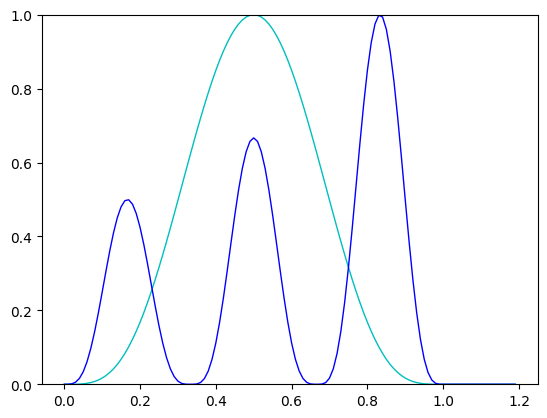

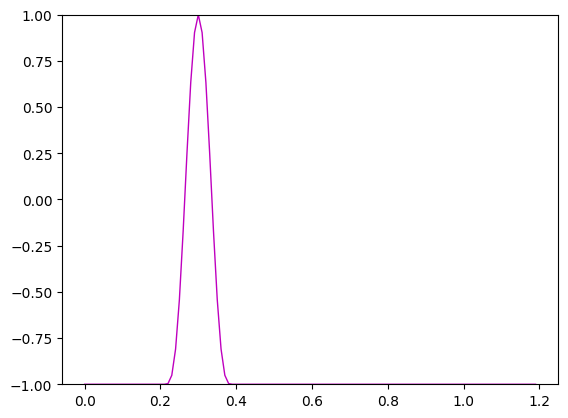

In [4]:
class Lenia:
    pass

def set_params(s, R, peaks, mu, sigma, dt, kernel_type=0, delta_type=0):
    s.R = R; s.peaks = peaks; s.mu = mu; s.sigma = sigma; s.dt = dt
    s.kernel_type = kernel_type; s.delta_type = delta_type
Lenia.set_params = set_params

def kernel_core(s, r):
    rm = np.minimum(r, 1)
    if s.kernel_type == 0:
        return (4 * rm * (1-rm))**4
    else:
        return np.exp( 4 - 1 / (rm * (1-rm)) )
Lenia.kernel_core = kernel_core
    
def kernel_shell(s, r):
    k = len(s.peaks)
    kr = k * r
    peak = s.peaks[np.minimum(np.floor(kr).astype(int), k-1)]
    return (r<1) * s.kernel_core(kr % 1) * peak
Lenia.kernel_shell = kernel_shell

def delta_func(s, n):
    if s.delta_type == 0:
        return np.maximum(0, 1 - (n - s.mu)**2 / (s.sigma**2 * 9) )**4 * 2 - 1
    else:
        return np.exp( - (n - s.mu)**2 / (s.sigma**2 * 2) ) * 2 - 1
Lenia.delta_func = delta_func

lenia = Lenia()
lenia.set_params(R=52, peaks=np.array([1/2, 2/3, 1]), 
                 mu=0.3, sigma=0.03, dt=0.1,
                 kernel_type=0, delta_type=0)

x = np.arange(0, 1.2, 0.01)
plt.plot(x, lenia.kernel_core(x), 'c-', 
         x, lenia.kernel_shell(x), 'b-', linewidth=1)
plt.ylim((0, 1))
plt.show()
plt.plot(x, lenia.delta_func(x), 'm-', linewidth=1)
plt.ylim((-1, 1))
plt.show()

In [5]:
def show_world(s, A, vmin=0, vmax=1, is_display=True):
    dpi = 80
    fig = plt.figure(figsize=(np.shape(A)[1]/dpi, np.shape(A)[0]/dpi), dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    img = ax.imshow(A, cmap='jet', interpolation='none', aspect=1, vmin=vmin, vmax=vmax)
    #fig.figimage(A)
    #plt.subplot(1, 2, 1)
    #plt.imshow(A, cmap='jet', interpolation='none') #nipy_spectral gist_ncar
    if is_display: plt.show()
    return fig, img
Lenia.show_world = show_world

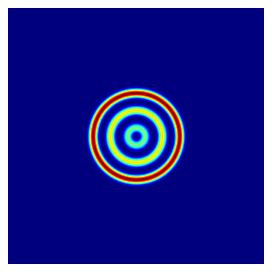

In [6]:
def calc_kernel(s):
    I = np.array([np.arange(SIZE),]*SIZE)
    X = (I-MID) / s.R
    Y = X.T
    D = np.sqrt(X**2 + Y**2)

    s.kernel = s.kernel_shell(D)
    s.kernel_sum = np.sum(s.kernel)
    kernel_norm = s.kernel / s.kernel_sum
    s.kernel_FFT = np.fft.fft2(kernel_norm)
Lenia.calc_kernel = calc_kernel

lenia.calc_kernel()
#lenia.show_world(lenia.D, 0, None)
fig = lenia.show_world(lenia.kernel)
#lenia.show_world(np.fft.fftshift(abs(lenia.kernel_FFT)))

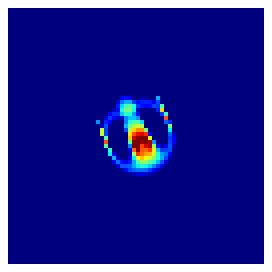

In [7]:
def load_cells(s, id):
    if id==0: s.name='Orbium bicaudatus'; s.set_params(R=13,peaks=np.array([1]),mu=0.15,sigma=0.014,dt=0.1);s.cells=np.array([[0,0,0,0,0,0,0.1,0.14,0.1,0,0,0.03,0.03,0,0,0.3,0,0,0,0],[0,0,0,0,0,0.08,0.24,0.3,0.3,0.18,0.14,0.15,0.16,0.15,0.09,0.2,0,0,0,0],[0,0,0,0,0,0.15,0.34,0.44,0.46,0.38,0.18,0.14,0.11,0.13,0.19,0.18,0.45,0,0,0],[0,0,0,0,0.06,0.13,0.39,0.5,0.5,0.37,0.06,0,0,0,0.02,0.16,0.68,0,0,0],[0,0,0,0.11,0.17,0.17,0.33,0.4,0.38,0.28,0.14,0,0,0,0,0,0.18,0.42,0,0],[0,0,0.09,0.18,0.13,0.06,0.08,0.26,0.32,0.32,0.27,0,0,0,0,0,0,0.82,0,0],[0.27,0,0.16,0.12,0,0,0,0.25,0.38,0.44,0.45,0.34,0,0,0,0,0,0.22,0.17,0],[0,0.07,0.2,0.02,0,0,0,0.31,0.48,0.57,0.6,0.57,0,0,0,0,0,0,0.49,0],[0,0.59,0.19,0,0,0,0,0.2,0.57,0.69,0.76,0.76,0.49,0,0,0,0,0,0.36,0],[0,0.58,0.19,0,0,0,0,0,0.67,0.83,0.9,0.92,0.87,0.12,0,0,0,0,0.22,0.07],[0,0,0.46,0,0,0,0,0,0.7,0.93,1,1,1,0.61,0,0,0,0,0.18,0.11],[0,0,0.82,0,0,0,0,0,0.47,1,1,0.98,1,0.96,0.27,0,0,0,0.19,0.1],[0,0,0.46,0,0,0,0,0,0.25,1,1,0.84,0.92,0.97,0.54,0.14,0.04,0.1,0.21,0.05],[0,0,0,0.4,0,0,0,0,0.09,0.8,1,0.82,0.8,0.85,0.63,0.31,0.18,0.19,0.2,0.01],[0,0,0,0.36,0.1,0,0,0,0.05,0.54,0.86,0.79,0.74,0.72,0.6,0.39,0.28,0.24,0.13,0],[0,0,0,0.01,0.3,0.07,0,0,0.08,0.36,0.64,0.7,0.64,0.6,0.51,0.39,0.29,0.19,0.04,0],[0,0,0,0,0.1,0.24,0.14,0.1,0.15,0.29,0.45,0.53,0.52,0.46,0.4,0.31,0.21,0.08,0,0],[0,0,0,0,0,0.08,0.21,0.21,0.22,0.29,0.36,0.39,0.37,0.33,0.26,0.18,0.09,0,0,0],[0,0,0,0,0,0,0.03,0.13,0.19,0.22,0.24,0.24,0.23,0.18,0.13,0.05,0,0,0,0],[0,0,0,0,0,0,0,0,0.02,0.06,0.08,0.09,0.07,0.05,0.01,0,0,0,0,0]])
    elif id==1: s.name='Rotorbium'; s.set_params(R=13,peaks=np.array([1]),mu=0.156,sigma=0.0224,dt=0.1);s.cells=np.array([[0,0,0,0,0,0,0,0,0.003978,0.016492,0.004714,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.045386,0.351517,0.417829,0.367137,0.37766,0.426948,0.431058,0.282864,0.081247,0,0,0,0,0,0],[0,0,0,0,0.325473,0.450995,0.121737,0,0,0,0.003113,0.224278,0.47101,0.456459,0.247231,0.071609,0.013126,0,0,0],[0,0,0,0.386337,0.454077,0,0,0,0,0,0,0,0.27848,0.524466,0.464281,0.242651,0.096721,0.038476,0,0],[0,0,0.258817,0.583802,0.150994,0,0,0,0,0,0,0,0.226639,0.548329,0.550422,0.334764,0.153108,0.087049,0.042872,0],[0,0.008021,0.502406,0.524042,0.059531,0,0,0,0,0,0,0.033946,0.378866,0.615467,0.577527,0.357306,0.152872,0.090425,0.058275,0.023345],[0,0.179756,0.596317,0.533619,0.162612,0,0,0,0,0.015021,0.107673,0.325125,0.594765,0.682434,0.594688,0.381172,0.152078,0.073544,0.054424,0.030592],[0,0.266078,0.614339,0.605474,0.379255,0.195176,0.16516,0.179148,0.204498,0.299535,0.760743,1,1,1,1,0.490799,0.237826,0.069989,0.043549,0.022165],[0,0.333031,0.64057,0.686886,0.60698,0.509866,0.450525,0.389552,0.434978,0.859115,0.94097,1,1,1,1,1,0.747866,0.118317,0.037712,0.006271],[0,0.417887,0.6856,0.805342,0.824229,0.771553,0.69251,0.614328,0.651704,0.843665,0.910114,1,1,0.81765,0.703404,0.858469,1,0.613961,0.035691,0],[0.04674,0.526827,0.787644,0.895984,0.734214,0.661746,0.670024,0.646184,0.69904,0.723163,0.682438,0.618645,0.589858,0.374017,0.30658,0.404027,0.746403,0.852551,0.031459,0],[0.130727,0.658494,0.899652,0.508352,0.065875,0.009245,0.232702,0.419661,0.461988,0.470213,0.390198,0.007773,0,0.010182,0.080666,0.17231,0.44588,0.819878,0.034815,0],[0.198532,0.810417,0.63725,0.031385,0,0,0,0,0.315842,0.319248,0.321024,0,0,0,0,0.021482,0.27315,0.747039,0,0],[0.217619,0.968727,0.104843,0,0,0,0,0,0.152033,0.158413,0.114036,0,0,0,0,0,0.224751,0.647423,0,0],[0.138866,1,0.093672,0,0,0,0,0,0.000052,0.015966,0,0,0,0,0,0,0.281471,0.455713,0,0],[0,1,0.145606,0.005319,0,0,0,0,0,0,0,0,0,0,0,0.016878,0.381439,0.173336,0,0],[0,0.97421,0.262735,0.096478,0,0,0,0,0,0,0,0,0,0,0.013827,0.217967,0.287352,0,0,0],[0,0.593133,0.2981,0.251901,0.167326,0.088798,0.041468,0.013086,0.002207,0.009404,0.032743,0.061718,0.102995,0.1595,0.24721,0.233961,0.002389,0,0,0],[0,0,0.610166,0.15545,0.200204,0.228209,0.241863,0.243451,0.270572,0.446258,0.376504,0.174319,0.154149,0.12061,0.074709,0,0,0,0,0],[0,0,0.354313,0.32245,0,0,0,0.151173,0.479517,0.650744,0.392183,0,0,0,0,0,0,0,0,0],[0,0,0,0.329339,0.328926,0.176186,0.198788,0.335721,0.534118,0.549606,0.361315,0,0,0,0,0,0,0,0,0],[0,0,0,0,0.090407,0.217992,0.190592,0.174636,0.222482,0.375871,0.265924,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0.050256,0.235176,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0.180145,0.132616,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0.092581,0.188519,0.118256,0,0,0,0]]) 
Lenia.load_cells = load_cells

def clear_world(s):
    s.world = np.zeros((SIZE, SIZE))
Lenia.clear_world = clear_world

def add_cells(s):
    w = np.shape(s.cells)[1]
    h = np.shape(s.cells)[0]
    i = MID - int(w / 2)
    j = MID - int(h / 2)
    s.world[j:j+h, i:i+w] = s.cells
Lenia.add_cells = add_cells

def multiply_cells(s, n=2):
    w = np.shape(s.cells)[1] * n
    h = np.shape(s.cells)[0] * n
    cells2 = np.zeros((h, w))
    for i in range(n):
        for j in range(n):
            cells2[i:h:n, j:w:n] = s.cells
    s.cells = cells2
    s.R = s.R * n
Lenia.multiply_cells = multiply_cells

lenia.clear_world()
lenia.load_cells(0)
lenia.multiply_cells(4)
lenia.calc_kernel()
lenia.add_cells()
fig = lenia.show_world(lenia.world)
#fig = lenia.show_world(lenia.kernel)

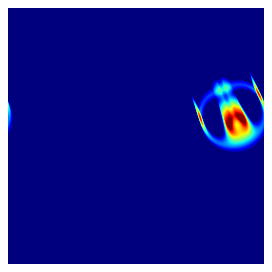

In [8]:
def calc_once(s, is_update=True):
    world_FFT = np.fft.fft2(s.world)
    s.potential = np.roll(np.real(np.fft.ifft2(s.kernel_FFT * world_FFT)), MID, (0, 1))
    s.delta = s.delta_func(s.potential)
    if is_update: s.world = np.maximum(0, np.minimum(1, s.world + s.delta * s.dt))
Lenia.calc_once = calc_once

lenia.calc_once()
fig, img = lenia.show_world(lenia.world, is_display=False)
#img = lenia.show_world(lenia.potential, 0, 0.3)
#img = lenia.show_world(lenia.delta, -1, 1)

def animate(i):
    lenia.calc_once()
    img.set_array(lenia.world)
    return img,

plt.rcParams["animation.html"] = "jshtml"

anim = animation.FuncAnimation(fig, animate, frames=100, interval=50, blit=True)
HTML(anim.to_jshtml())

In [ ]:
def run_lenia(animal_id):
    def run_animate(i):
        lenia.calc_once()
        img.set_array(lenia.world)
        return img,

    lenia = Lenia()
    lenia.clear_world()
    lenia.load_cells(animal_id)
    lenia.multiply_cells(4)
    lenia.calc_kernel()
    lenia.add_cells()
    fig, img = lenia.show_world(lenia.world, is_display=False)
    return animation.FuncAnimation(fig, run_animate, frames=100, interval=50, blit=True)

i = interact(run_lenia, animal_id={
    'Orbium bicaudatus':0, 
    'Rotorbium':1})